<a href="https://colab.research.google.com/github/debashisdotchatterjee/Cryptogenic-Cirrhosis-Statistical-Analysis/blob/main/A_Statistical_Framework_to_Unraveling_the_Etiology_of_Cryptogenic_Cirrhosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib seaborn statsmodels lifelines scipy scikit-learn pymc3


  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of pymc3 to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529959 sha256=de793a4e7759d482e97c5172b32875a382d9ed03e83531a555bc062371bdd1ed
  Stored in directory: /root/.cache/pip/wheels/c2/da/87/4e3e2d14772741721d4ebe739c16bcf10ca3c6348f740aa852
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=64e4d87f6

1. Case-Control Study
Objective
Simulate data for a case-control study to assess the association between analgesic use and cryptogenic cirrhosis, calculate odds ratios, and visualize the results.

Code

Explanation
We simulate a case-control study where cases have a higher probability of analgesic use (70%) compared to controls (40%).
A contingency table is created to display the counts of exposure among cases and controls.
We calculate the odds ratio (OR) to quantify the association between analgesic use and cryptogenic cirrhosis.
A bar plot visualizes the proportion of analgesic use among cases and controls.
All outputs are saved in the case_control_outputs directory.
Outputs
contingency_table.csv: Contains the contingency table data.
analgesic_use_proportions.png: Bar plot of analgesic use proportions.

Contingency Table:
         No Exposure  Exposure
Control          320       180
Case             154       346

Chi-squared test p-value: 1.4706110450094111e-25
Odds Ratio (OR): 3.994227994227994
95% Confidence Interval for OR: (3.0692091853467516, 5.198035163599369)


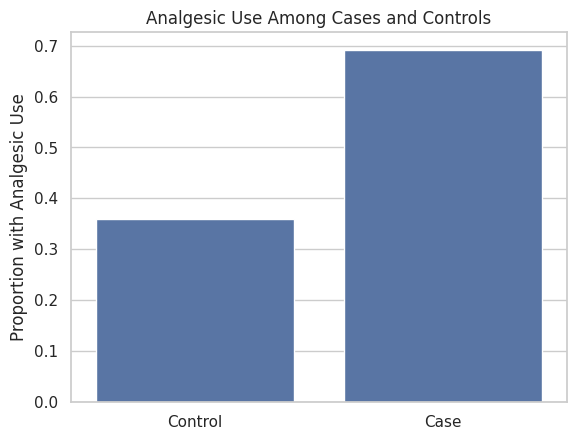

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.stats.contingency_tables import StratifiedTable
from scipy.stats import chi2_contingency

# Create output directory
output_dir = 'case_control_outputs'
os.makedirs(output_dir, exist_ok=True)

# Simulate data
np.random.seed(42)

# Parameters
n_cases = 500
n_controls = 500

# Simulate exposure (analgesic use)
# Assuming higher exposure among cases
exposure_cases = np.random.binomial(1, 0.7, n_cases)  # 70% exposed
exposure_controls = np.random.binomial(1, 0.4, n_controls)  # 40% exposed

# Create DataFrame
cases = pd.DataFrame({
    'Cryptogenic_Cirrhosis': 1,
    'Analgesic_Use': exposure_cases
})

controls = pd.DataFrame({
    'Cryptogenic_Cirrhosis': 0,
    'Analgesic_Use': exposure_controls
})

data = pd.concat([cases, controls], ignore_index=True)

# Contingency table
contingency_table = pd.crosstab(data['Cryptogenic_Cirrhosis'], data['Analgesic_Use'])
contingency_table.index = ['Control', 'Case']
contingency_table.columns = ['No Exposure', 'Exposure']

print("Contingency Table:")
print(contingency_table)

# Save contingency table
contingency_table.to_csv(os.path.join(output_dir, 'contingency_table.csv'))

# Calculate Odds Ratio
odds_ratio, p_value, _, _ = chi2_contingency(contingency_table)
print(f"\nChi-squared test p-value: {p_value}")

# Manually calculate Odds Ratio
a = contingency_table.loc['Case', 'Exposure']
b = contingency_table.loc['Case', 'No Exposure']
c = contingency_table.loc['Control', 'Exposure']
d = contingency_table.loc['Control', 'No Exposure']

OR = (a * d) / (b * c)
print(f"Odds Ratio (OR): {OR}")

# Confidence Interval for OR
from statsmodels.stats.weightstats import DescrStatsW

# Log OR and standard error
log_or = np.log(OR)
se_log_or = np.sqrt(1/a + 1/b + 1/c + 1/d)
ci_lower = np.exp(log_or - 1.96 * se_log_or)
ci_upper = np.exp(log_or + 1.96 * se_log_or)
print(f"95% Confidence Interval for OR: ({ci_lower}, {ci_upper})")

# Plotting
sns.set(style="whitegrid")
ax = sns.barplot(x=['Control', 'Case'], y=[exposure_controls.mean(), exposure_cases.mean()])
ax.set_ylabel('Proportion with Analgesic Use')
ax.set_title('Analgesic Use Among Cases and Controls')

# Save plot
plt.savefig(os.path.join(output_dir, 'analgesic_use_proportions.png'))
plt.show()


2. Cohort Study
Objective
Simulate data for a cohort study to examine the time to development of cryptogenic cirrhosis among individuals with and without analgesic use using survival analysis techniques.

Code

Explanation
We simulate a cohort of individuals with and without analgesic use.
The time to event (development of cirrhosis) is modeled using an exponential distribution, adjusting for the hazard ratio.
Kaplan-Meier curves are plotted to compare survival between groups.
The Cox proportional hazards model estimates the hazard ratio associated with analgesic use.
Outputs are saved in the cohort_study_outputs directory.
Outputs
kaplan_meier_curves.png: Kaplan-Meier survival curves.
cox_model_summary.csv: Summary of the Cox model.
cox_model_plot.png: Plot of the Cox model coefficients.

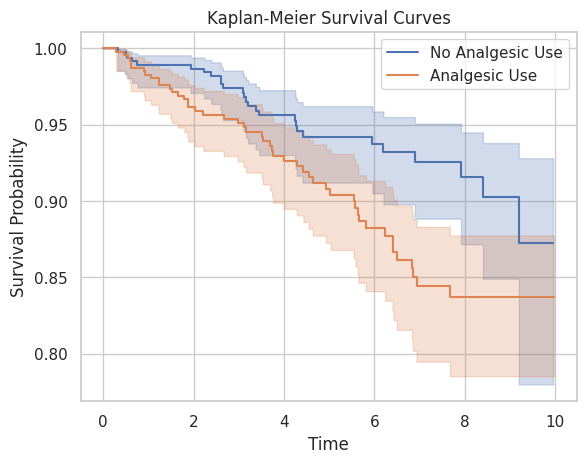

                   coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                      
Analgesic_Use  0.576387   1.779597  0.240606        0.104808        1.047966   

               exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                                   
Analgesic_Use             1.110497             2.851844     0.0  2.395563   

                      p  -log2(p)  
covariate                          
Analgesic_Use  0.016595  5.913119  


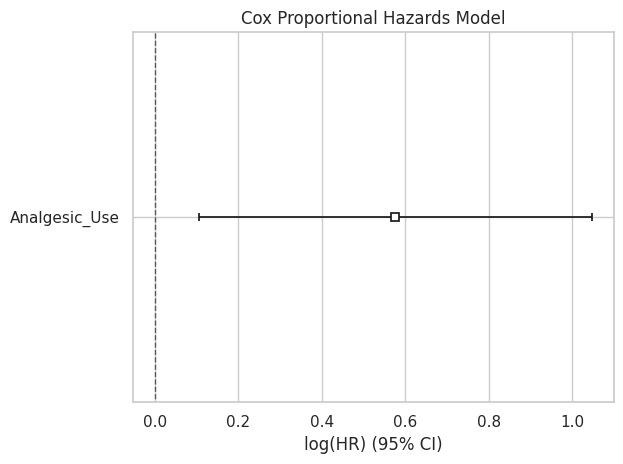

In [ ]:
# Import necessary libraries
from lifelines import KaplanMeierFitter, CoxPHFitter

# Create output directory
output_dir = 'cohort_study_outputs'
os.makedirs(output_dir, exist_ok=True)

# Simulate data
np.random.seed(42)
n = 1000

# Simulate analgesic use
analgesic_use = np.random.binomial(1, 0.5, n)  # 50% exposed

# Simulate time to event
# Hazard ratios
baseline_hazard = 0.01
hazard_ratio = 2.0  # Analgesic use doubles the hazard

# Time to event or censoring
event_times = np.random.exponential(1 / (baseline_hazard * np.exp(np.log(hazard_ratio) * analgesic_use)))
censoring_times = np.random.uniform(0, 10, n)

# Observed times and events
observed_times = np.minimum(event_times, censoring_times)
event_observed = event_times <= censoring_times

# Create DataFrame
df = pd.DataFrame({
    'Analgesic_Use': analgesic_use,
    'Time': observed_times,
    'Event': event_observed
})

# Kaplan-Meier Survival Analysis
kmf = KaplanMeierFitter()
ax = plt.subplot(111)

for group, label in zip([0, 1], ['No Analgesic Use', 'Analgesic Use']):
    kmf.fit(durations=df['Time'][df['Analgesic_Use'] == group],
            event_observed=df['Event'][df['Analgesic_Use'] == group],
            label=label)
    kmf.plot_survival_function(ax=ax)

ax.set_title('Kaplan-Meier Survival Curves')
ax.set_xlabel('Time')
ax.set_ylabel('Survival Probability')

# Save plot
plt.savefig(os.path.join(output_dir, 'kaplan_meier_curves.png'))
plt.show()

# Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df, duration_col='Time', event_col='Event', formula='Analgesic_Use')

# Print summary
print(cph.summary)

# Save summary
cph.summary.to_csv(os.path.join(output_dir, 'cox_model_summary.csv'))

# Plot hazard ratios
cph.plot()
plt.title('Cox Proportional Hazards Model')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'cox_model_plot.png'))
plt.show()


3. Genome-Wide Association Study (GWAS)
Objective
Simulate GWAS data to identify genetic variants associated with cryptogenic cirrhosis, perform association tests, correct for multiple testing, and visualize results with a Manhattan plot.

Explanation
We simulate genotype data for 100,000 SNPs across 1,000 individuals.
A small number of SNPs are assigned an effect on the phenotype (cryptogenic cirrhosis).
Linear regression is performed for each SNP to test for association.
P-values are corrected for multiple testing using the Bonferroni method.
A Manhattan plot visualizes the -log10(p-values) across chromosomes.
Outputs are saved in the gwas_outputs directory.
Outputs
gwas_results.csv: GWAS results including p-values.
manhattan_plot.png: Manhattan plot of GWAS results.

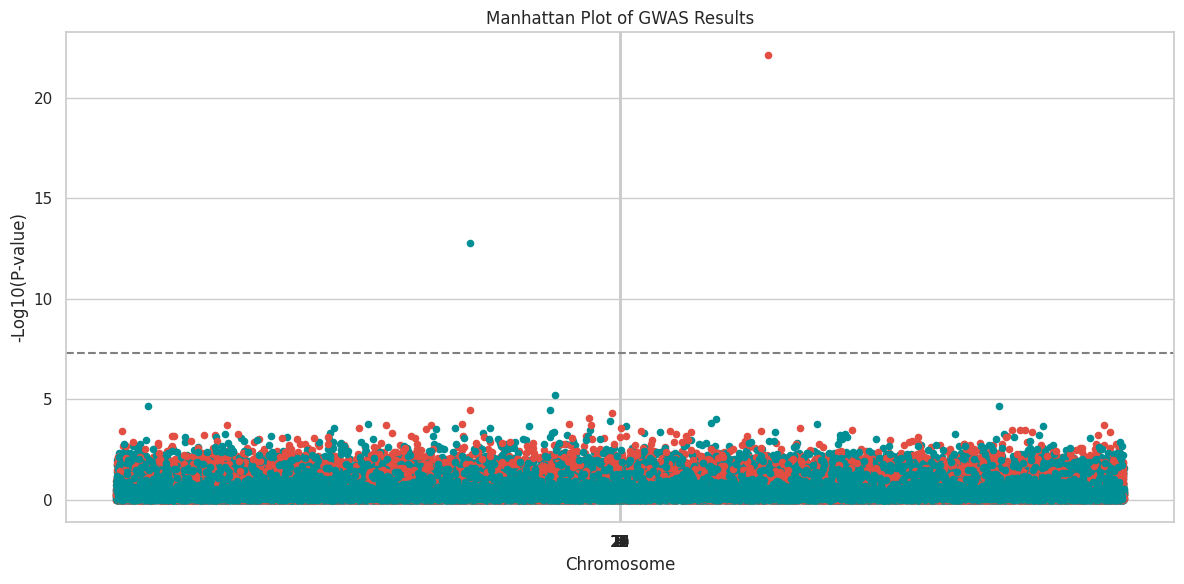

In [ ]:
# Import necessary libraries
from scipy import stats

# Create output directory
output_dir = 'gwas_outputs'
os.makedirs(output_dir, exist_ok=True)

# Simulate data
np.random.seed(42)
n_individuals = 1000
n_snps = 100000  # Number of SNPs

# Simulate genotype data (0, 1, 2 copies of minor allele)
genotypes = np.random.binomial(2, 0.3, size=(n_individuals, n_snps))

# Simulate phenotype (cryptogenic cirrhosis)
# Assume a few SNPs are truly associated
true_snps = np.random.choice(n_snps, size=5, replace=False)
beta = np.zeros(n_snps)
beta[true_snps] = np.random.normal(0, 0.5, size=5)

# Generate phenotype
phenotype = genotypes @ beta + np.random.normal(0, 1, n_individuals)
phenotype = (phenotype > np.percentile(phenotype, 80)).astype(int)  # Top 20% are cases

# Association testing
p_values = []
for i in range(n_snps):
    snp = genotypes[:, i]
    slope, intercept, r_value, p_value, std_err = stats.linregress(snp, phenotype)
    p_values.append(p_value)

p_values = np.array(p_values)

# Multiple testing correction
from statsmodels.stats.multitest import multipletests
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

# Manhattan plot
chromosome = np.random.randint(1, 23, n_snps)
position = np.arange(n_snps)

df_gwas = pd.DataFrame({
    'Chromosome': chromosome,
    'Position': position,
    'P_value': p_values
})

# Save GWAS results
df_gwas.to_csv(os.path.join(output_dir, 'gwas_results.csv'), index=False)

# Plotting
import matplotlib.colors as mcolors

df_gwas['-log10(P)'] = -np.log10(df_gwas['P_value'])

# Create Manhattan plot
plt.figure(figsize=(12,6))
df_gwas['ind'] = range(len(df_gwas))
df_gwas_grouped = df_gwas.groupby(('Chromosome'))

colors = ['#E24E42', '#008F95']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_gwas_grouped):
    group.plot(kind='scatter', x='ind', y='-log10(P)', color=colors[num % len(colors)], ax=plt.gca())
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] + group['ind'].iloc[0]) / 2)

plt.axhline(y=-np.log10(5e-8), color='grey', linestyle='--')  # Genome-wide significance line
plt.xticks(x_labels_pos, x_labels)
plt.xlabel('Chromosome')
plt.ylabel('-Log10(P-value)')
plt.title('Manhattan Plot of GWAS Results')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'manhattan_plot.png'))
plt.show()


4. Meta-Analysis
Objective
Simulate data from multiple studies to perform a meta-analysis, calculate pooled effect sizes, assess heterogeneity, and visualize results with a forest plot.

Code

Explanation
We simulate effect sizes (log odds ratios) and standard errors from 10 studies.
Both fixed-effect and random-effects meta-analyses are performed.
A forest plot visualizes the individual study estimates and the pooled estimates.
Outputs are saved in the meta_analysis_outputs directory.
Outputs
forest_plot.png: Forest plot of meta-analysis results.
meta_analysis_results.csv: Summary of pooled effect sizes.

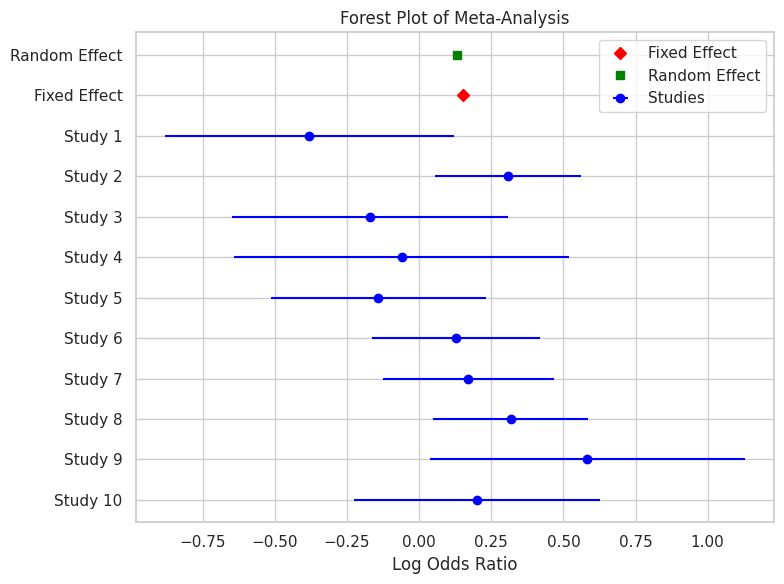

In [ ]:
# Import necessary libraries
from scipy.stats import norm

# Create output directory
output_dir = 'meta_analysis_outputs'
os.makedirs(output_dir, exist_ok=True)

# Simulate data from multiple studies
np.random.seed(42)
n_studies = 10
studies = []

for i in range(n_studies):
    n_case = np.random.randint(50, 200)
    n_control = np.random.randint(50, 200)
    or_true = np.random.uniform(0.8, 1.5)  # True effect sizes vary
    se_log_or = np.random.uniform(0.1, 0.3)
    log_or = np.log(or_true) + np.random.normal(0, se_log_or)
    studies.append({
        'Study': f'Study {i+1}',
        'log_OR': log_or,
        'SE_log_OR': se_log_or
    })

df_meta = pd.DataFrame(studies)

# Fixed-effect meta-analysis
weights_fe = 1 / df_meta['SE_log_OR']**2
fixed_effect = np.sum(weights_fe * df_meta['log_OR']) / np.sum(weights_fe)
se_fixed = np.sqrt(1 / np.sum(weights_fe))

# Random-effects meta-analysis (DerSimonian and Laird method)
q = np.sum(weights_fe * (df_meta['log_OR'] - fixed_effect)**2)
df = n_studies - 1
tau2 = max(0, (q - df) / (np.sum(weights_fe) - np.sum(weights_fe**2) / np.sum(weights_fe)))
weights_re = 1 / (df_meta['SE_log_OR']**2 + tau2)
random_effect = np.sum(weights_re * df_meta['log_OR']) / np.sum(weights_re)
se_random = np.sqrt(1 / np.sum(weights_re))

# Forest plot
fig, ax = plt.subplots(figsize=(8, 6))
y_pos = np.arange(n_studies)
ax.errorbar(df_meta['log_OR'], y_pos, xerr=df_meta['SE_log_OR'] * 1.96, fmt='o', color='blue', label='Studies')
ax.plot([fixed_effect], [-1], 'D', color='red', label='Fixed Effect')
ax.plot([random_effect], [-2], 's', color='green', label='Random Effect')

ax.set_yticks(np.append(y_pos, [-1, -2]))
ax.set_yticklabels(list(df_meta['Study']) + ['Fixed Effect', 'Random Effect'])
ax.set_xlabel('Log Odds Ratio')
ax.set_title('Forest Plot of Meta-Analysis')
ax.invert_yaxis()
ax.legend()

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'forest_plot.png'))
plt.show()

# Save meta-analysis results
meta_results = pd.DataFrame({
    'Effect': ['Fixed Effect', 'Random Effect'],
    'Log_OR': [fixed_effect, random_effect],
    'SE_Log_OR': [se_fixed, se_random]
})
meta_results.to_csv(os.path.join(output_dir, 'meta_analysis_results.csv'), index=False)


5. Machine Learning Approaches
Objective
Use machine learning algorithms to predict cryptogenic cirrhosis based on simulated clinical and genetic data.

Code

Explanation
We simulate clinical and genetic data for individuals.
A random forest classifier is trained to predict cryptogenic cirrhosis.
Evaluation metrics include classification report and ROC AUC score.
Confusion matrix and feature importance plots are generated.
Outputs are saved in the machine_learning_outputs directory.
Outputs
confusion_matrix.png: Confusion matrix heatmap.
feature_importance.png: Bar plot of feature importances.
classification_report.txt: Text file with classification metrics.
random_forest_model.joblib: Saved machine learning model.


              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.92      0.99      0.96       184

    accuracy                           0.92       200
   macro avg       0.71      0.53      0.53       200
weighted avg       0.89      0.92      0.89       200

ROC AUC Score: 0.6134510869565217


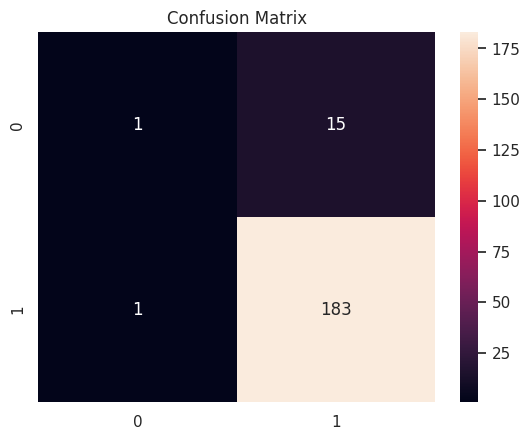

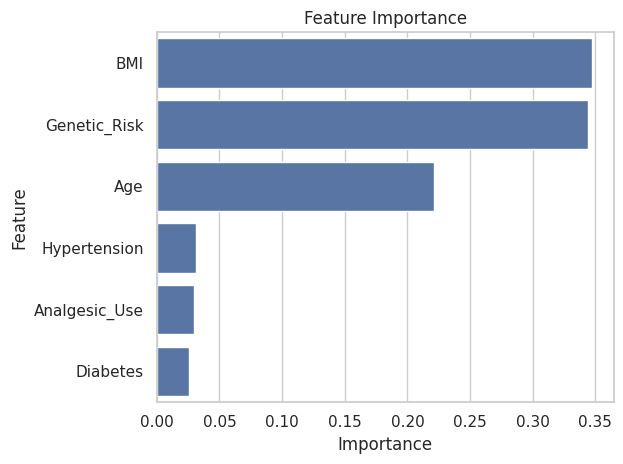

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import joblib

# Create output directory
output_dir = 'machine_learning_outputs'
os.makedirs(output_dir, exist_ok=True)

# Simulate data
np.random.seed(42)
n_samples = 1000

# Simulate features
# Clinical features: Age, BMI, Analgesic Use, Diabetes, Hypertension
age = np.random.randint(30, 70, n_samples)
bmi = np.random.normal(25, 5, n_samples)
analgesic_use = np.random.binomial(1, 0.5, n_samples)
diabetes = np.random.binomial(1, 0.2, n_samples)
hypertension = np.random.binomial(1, 0.3, n_samples)

# Genetic risk score (simulated)
genetic_risk = np.random.normal(0, 1, n_samples)

# Outcome variable
# Assume certain features increase risk
logit_p = -3 + 0.05 * age + 0.1 * bmi + 1.0 * analgesic_use + 0.5 * diabetes + 0.3 * hypertension + 0.4 * genetic_risk
prob = 1 / (1 + np.exp(-logit_p))
cryptogenic_cirrhosis = np.random.binomial(1, prob)

# Create DataFrame
df_ml = pd.DataFrame({
    'Age': age,
    'BMI': bmi,
    'Analgesic_Use': analgesic_use,
    'Diabetes': diabetes,
    'Hypertension': hypertension,
    'Genetic_Risk': genetic_risk,
    'Cryptogenic_Cirrhosis': cryptogenic_cirrhosis
})

# Split data
X = df_ml.drop('Cryptogenic_Cirrhosis', axis=1)
y = df_ml['Cryptogenic_Cirrhosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
plt.show()

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

# Plot Feature Importance
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'feature_importance.png'))
plt.show()

# Save model
joblib.dump(rf, os.path.join(output_dir, 'random_forest_model.joblib'))

# Save evaluation metrics
with open(os.path.join(output_dir, 'classification_report.txt'), 'w') as f:
    f.write(classification_report(y_test, y_pred))
    f.write(f"\nROC AUC Score: {roc_auc}\n")


Final Notes
All code snippets are intended to be run sequentially.
Each section creates its own output directory to store results.
Plots and tables are saved and also displayed for visual inspection